# Two Sigma Data Challenge_MTA Dataset_Jingru Li

##  Data Extraction and Cleansing

In [1]:
# import libraries
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import datetime

In [2]:
# get a list of data file names
ls_c = glob.glob('/Users/Michael/Downloads/python/tensorflow-testing/two sigma current/*.txt')
ls_p = glob.glob('/Users/Michael/Downloads/python/tensorflow-testing/two sigma pre/*.txt')

In [3]:
# load current datasets into a pandas dataframe
start = timeit.default_timer()

df_current = pd.read_csv('two sigma current/turnstile_170624.txt', sep = ',')
ls_c = ls_c[:-1]

for file in ls_c:
    df_current = df_current.append(pd.read_csv(file, sep = ','))

stop = timeit.default_timer()
print(stop - start)

315.55373182403855


In [4]:
# define a function to flatten the file shape
def flat(df):
    col_1 = ['C/A','UNIT','SCP','DATE1','TIME1','DESC1','ENTRIES1','EXITS1']
    col_2 = ['C/A','UNIT','SCP','DATE2','TIME2','DESC2','ENTRIES2','EXITS2']
    col_3 = ['C/A','UNIT','SCP','DATE3','TIME3','DESC3','ENTRIES3','EXITS3']
    col_4 = ['C/A','UNIT','SCP','DATE4','TIME4','DESC4','ENTRIES4','EXITS4']
    col_5 = ['C/A','UNIT','SCP','DATE5','TIME5','DESC5','ENTRIES5','EXITS5']
    col_6 = ['C/A','UNIT','SCP','DATE6','TIME6','DESC6','ENTRIES6','EXITS6']
    col_7 = ['C/A','UNIT','SCP','DATE7','TIME7','DESC7','ENTRIES7','EXITS7']
    col_8 = ['C/A','UNIT','SCP','DATE8','TIME8','DESC8','ENTRIES8','EXITS8']
    colnew = ['C/A','UNIT','SCP','DATE','TIME','DESC','ENTRIES','EXITS']
    cols = [col_1, col_2, col_3, col_4, col_5, col_6, col_7, col_8]
    temp = []
    for i in range(8):
        df_temp = df[cols[i]]
        df_temp = df_temp.rename(columns = {df_temp.columns[3]: 'DATE', 
                                            df_temp.columns[4]: 'TIME',
                                            df_temp.columns[5]: 'DESC', 
                                            df_temp.columns[6]: 'ENTRIES',
                                            df_temp.columns[7]: 'EXITS'})
        temp.append(df_temp)
    df_trans = pd.concat(temp)
    df_trans.dropna(inplace = True)
    return df_trans

In [5]:
# load pre 10/18/2014 datasets into a pandas dataframe
start = timeit.default_timer()
# ls_p = glob.glob('/Users/Michael/Downloads/python/tensorflow-testing/two sigma pre/*.txt')
# since the pre datasets does not have column names, the column names will be manually 
# embedded into the dataframe
col_nms = ['C/A','UNIT','SCP','DATE1','TIME1','DESC1','ENTRIES1','EXITS1',
           'DATE2','TIME2','DESC2','ENTRIES2','EXITS2',
           'DATE3','TIME3','DESC3','ENTRIES3','EXITS3',
           'DATE4','TIME4','DESC4','ENTRIES4','EXITS4',
           'DATE5','TIME5','DESC5','ENTRIES5','EXITS5',
           'DATE6','TIME6','DESC6','ENTRIES6','EXITS6',
           'DATE7','TIME7','DESC7','ENTRIES7','EXITS7',
           'DATE8','TIME8','DESC8','ENTRIES8','EXITS8']

# since file 'turnstile_120714.txt' (114) and file 'turnstile_120505.txt' (104) are messier 
# than other files, these two files will be cleansed and loaded seperately.

df_prea = pd.read_csv(ls_p[-1], sep = ',', names = col_nms)
df_prea = flat(df_prea)
ls_p = ls_p[:-1]
del ls_p[114]
del ls_p[104]
n = int(len(ls_p)/2)

for file in ls_p[:n]:
    df_tempa = pd.read_csv(file, sep = ',', names = col_nms)
    df_tempa = flat(df_tempa)
    df_prea = df_prea.append(df_tempa)

df_preb = pd.read_csv(ls_p[n], sep = ',', names = col_nms)
df_preb = flat(df_preb)    
for file in ls_p[n+1:]:
    df_tempb = pd.read_csv(file, sep = ',', names = col_nms)
    df_tempb = flat(df_tempb)
    df_preb = df_preb.append(df_tempb)

stop = timeit.default_timer()
print(stop - start)
print(len(ls_p))
print(df_prea.shape)
print(df_preb.shape)


341.6285086189164
229
(24543496, 8)
(24970795, 8)


In [6]:
# load and flatten file 'turnstile_120714.txt' (114)
f_114 = ls_p[114]

df_114 = pd.read_csv(f_114, sep = ',', names = col_nms, skiprows = 10)
df_114_f = flat(df_114)

In [7]:
# load and flatten file 'turnstile_120505.txt' (104)
f_104 = ls_p[104]
df_104a = pd.read_csv(f_104, sep = ',', names = col_nms, nrows = 16384)
df_104b = pd.read_csv(f_104, sep = ',', names = col_nms, skiprows = 16384)
df_104 = df_104a.append(df_104b)
df_104_f = flat(df_104)

In [8]:
# append all 4 dataframes together to form a large dataframe that holds all data pre
# Since there are 6 different types of description, only those labeled as 'REGULAR' will be
# considered without further information
# concat date and time together and change the datatype to datetime
start = timeit.default_timer()
df_pre = df_prea.append(df_preb).append(df_104_f).append(df_114_f)
df_pre = df_pre[df_pre['DESC'] == 'REGULAR']
datetime = df_pre.DATE + ' ' + df_pre.TIME
df_pre['DATETIME'] = pd.to_datetime(datetime, format='%m-%d-%y %H:%M:%S')
df_pre.head()
stop = timeit.default_timer()
print(stop - start)
print(df_pre.shape)

247.73638331703842
(42577162, 9)


In [9]:
# load the excel file that shows the relationship among units, stations, lines, etc.
df_rel = pd.read_excel('Remote-Booth-Station.xls')
df_rel['CONDITION'] = df_rel['Booth'] + '-' + df_rel['Remote']

print(df_rel.shape)
print(df_rel.head())

(768, 6)
  Remote  Booth       Station Line Name Division   CONDITION
0   R001   A060  WHITEHALL ST        R1      BMT   A060-R001
1   R001   A058  WHITEHALL ST        R1      BMT   A058-R001
2   R001  R101S   SOUTH FERRY        R1      IRT  R101S-R001
3   R002   A077     FULTON ST  ACJZ2345      BMT   A077-R002
4   R002   A081     FULTON ST  ACJZ2345      BMT   A081-R002


In [10]:
df_2013 = df_pre[df_pre['DATE'].str[-2:] == '13']

df_2013['TURNSTILE'] = df_2013['C/A'] + '-' + df_2013['UNIT'] + '-' + df_2013['SCP']
df_2013['CONDITION'] = df_2013['C/A'] + '-' + df_2013['UNIT']
df_2013= pd.merge(df_2013, df_rel[['CONDITION','Station']],left_on = 'CONDITION', right_on = 'CONDITION', how = 'left')

/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
df_2013.sort_values(['Station', 'TURNSTILE', 'DATETIME'])
# define a function to calculate ENTRIES_MARGINAL and EXITS_MARGINAL

def marginal_change(i):
    if len(i) != 2:
        return np.nan
    last, now = i
    # if last > now then the odometer has been reset. The value will be discarded.
    return now - last if last <= now else now
marginal_change_rolling = lambda ser: ser.rolling(window=2).apply(marginal_change)
# compute marginal change of entries and exits using rolling window
df_grouped = df_2013.groupby(['TURNSTILE','Station'])
df_2013['EXITS_MARGINAL']   = df_grouped['EXITS'].apply(marginal_change_rolling)
df_2013['ENTRIES_MARGINAL'] = df_grouped['ENTRIES'].apply(marginal_change_rolling)
# for some periods the stations are closed. They will be marked as NaN
for col in ['ENTRIES_MARGINAL', 'EXITS_MARGINAL']:
    df_2013.ix[df_2013[col] < 0, col] = np.nan


/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [12]:
df_2013.head(20)

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE,CONDITION,Station,EXITS_MARGINAL,ENTRIES_MARGINAL
0,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806.0,1355869.0,2013-01-02 03:00:00,A002-R051-02-00-00,A002-R051,LEXINGTON AVE,NaN,NaN
1,A002,R051,02-00-00,01-02-13,23:00:00,REGULAR,3934459.0,1356406.0,2013-01-02 23:00:00,A002-R051-02-00-00,A002-R051,LEXINGTON AVE,537.0,1653.0
2,A002,R051,02-00-00,01-03-13,19:00:00,REGULAR,3935784.0,1356882.0,2013-01-03 19:00:00,A002-R051-02-00-00,A002-R051,LEXINGTON AVE,476.0,1325.0
3,A002,R051,02-00-01,01-02-13,03:00:00,REGULAR,3759731.0,813220.0,2013-01-02 03:00:00,A002-R051-02-00-01,A002-R051,LEXINGTON AVE,NaN,NaN
4,A002,R051,02-00-01,01-02-13,23:00:00,REGULAR,3761049.0,813536.0,2013-01-02 23:00:00,A002-R051-02-00-01,A002-R051,LEXINGTON AVE,316.0,1318.0
5,A002,R051,02-00-01,01-03-13,15:00:00,REGULAR,3761385.0,813787.0,2013-01-03 15:00:00,A002-R051-02-00-01,A002-R051,LEXINGTON AVE,251.0,336.0
6,A002,R051,02-00-01,01-04-13,23:00:00,REGULAR,3763686.0,814168.0,2013-01-04 23:00:00,A002-R051-02-00-01,A002-R051,LEXINGTON AVE,381.0,2301.0
7,A002,R051,02-03-00,01-02-13,03:00:00,REGULAR,37053.0,133391.0,2013-01-02 03:00:00,A002-R051-02-03-00,A002-R051,LEXINGTON AVE,NaN,NaN
8,A002,R051,02-03-00,01-02-13,23:00:00,REGULAR,37734.0,135631.0,2013-01-02 23:00:00,A002-R051-02-03-00,A002-R051,LEXINGTON AVE,2240.0,681.0
9,A002,R051,02-03-00,01-04-13,07:00:00,REGULAR,38425.0,138094.0,2013-01-04 07:00:00,A002-R051-02-03-00,A002-R051,LEXINGTON AVE,2463.0,691.0


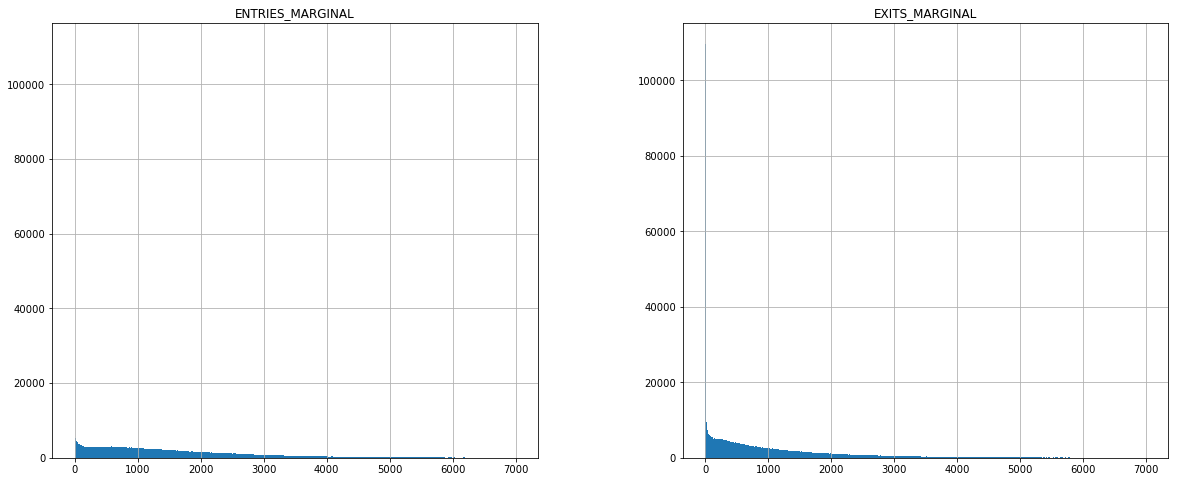

In [13]:
plt.figure()
sample = 1000000
hist = { 'bins':700, 'range':(0,7000), 'figsize':(20, 8) }
df_sample = df_2013.sample(n=sample).loc[:,['EXITS_MARGINAL','ENTRIES_MARGINAL']]
df_sample.hist(**hist)
plt.show()

In [14]:
# clearly counts beyond 6000 decreased sharply. Thus 6000 will be used to filter outliers.
df_2013 = df_2013[(df_2013['ENTRIES_MARGINAL'] <= 6000) & (df_2013['EXITS_MARGINAL'] <= 6000)]
df_2013[['EXITS_MARGINAL','ENTRIES_MARGINAL']].describe()

,EXITS_MARGINAL,ENTRIES_MARGINAL
count,8.089763e+06,8.089763e+06
mean,1.004464e+03,1.319604e+03
std,1.114988e+03,1.252853e+03
min,0.000000e+00,0.000000e+00
25%,1.640000e+02,2.930000e+02
50%,6.350000e+02,1.006000e+03
75%,1.462000e+03,1.994000e+03
max,6.000000e+03,6.000000e+03


In [15]:
df_2013['BUSY_MARGINAL'] = df_2013['ENTRIES_MARGINAL'] + df_2013['EXITS_MARGINAL']

/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Notes on data extraction and cleansing:
1. The problem may not require the full dataset to be loaded, however I always like to challenge myself loading and cleansing large dataset with limited RAM capacity. 
2. The current dataset is extremely clean. However the pre dataset has 2 files that messes up the whole process. Thus I used bisection search to find these two files and dealt with them accordingly.
3. Since the RAM capacity in my laptop is limited, the pre dataset is too huge to load at once. So I broke it down to two parts. Combining the two messy parts, I concatenated all four subsets to form a complete dataframe for the data pre 10/18/2014.
4. The station information is joined into the dataframe based on UNIT and C/A variables.
5. The turnstile is defined using C/A, UNIT and SCP.
6. The future questions only focus on year 2013.
7. The marginal change of entries and exits as well as business are computed for future use.

*************************

## Data Analysis:

Question 1: Which station has the most number of units as of today?

In [16]:
most_units_station = df_rel[['Station', 'Remote']].groupby(['Station']).agg('count').sort_values('Remote', ascending = False).head(1)
print(most_units_station.index[0], ' has the most number of units (', most_units_station.values[0][0], ' units) as of today.')

34 ST-PENN STA  has the most number of units ( 14  units) as of today.


34 ST-PENN STA has the most number of units (14 units) as of today.

***************************************************************************************

Question 2: What is the total number of entries & exits across the subway system for August 1, 2013?

In [17]:
from datetime import datetime
date_condition = (df_2013.DATETIME >= datetime(2013,8,1)) & (df_2013.DATETIME < datetime(2013,8,2))
df_2013_0801 = df_2013[date_condition]

In [18]:
entries_080113 = np.sum(df_2013_0801['ENTRIES_MARGINAL'])
exits_080113 = np.sum(df_2013_0801['EXITS_MARGINAL'])
    
print('The total number of entries on August 01, 2013 is: ', entries_080113)
print('The total number of exits on August 01, 2013 is: ', exits_080113)

The total number of entries on August 01, 2013 is:  40315523.0
The total number of exits on August 01, 2013 is:  30741828.0


In [19]:
df_2013_0801.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE,CONDITION,Station,EXITS_MARGINAL,ENTRIES_MARGINAL,BUSY_MARGINAL
5632463,A002,R051,02-00-00,08-01-13,00:00:00,REGULAR,4215894.0,1445274.0,2013-08-01 00:00:00,A002-R051-02-00-00,A002-R051,LEXINGTON AVE,537.0,2561.0,3098.0
5632469,A002,R051,02-00-01,08-01-13,04:00:00,REGULAR,3982869.0,865551.0,2013-08-01 04:00:00,A002-R051-02-00-01,A002-R051,LEXINGTON AVE,332.0,1500.0,1832.0
5632485,A002,R051,02-03-02,08-01-13,08:00:00,REGULAR,3581595.0,4947415.0,2013-08-01 08:00:00,A002-R051-02-03-02,A002-R051,LEXINGTON AVE,2271.0,1601.0,3872.0
5632491,A002,R051,02-03-03,08-01-13,08:00:00,REGULAR,3259913.0,4090513.0,2013-08-01 08:00:00,A002-R051-02-03-03,A002-R051,LEXINGTON AVE,1832.0,1386.0,3218.0
5632497,A002,R051,02-03-04,08-01-13,08:00:00,REGULAR,4163781.0,2497975.0,2013-08-01 08:00:00,A002-R051-02-03-04,A002-R051,LEXINGTON AVE,896.0,1668.0,2564.0


******

Question 3:  Let’s define the busy-ness as sum of entry & exit count. What station was the busiest on August 1, 2013? What turnstile was the busiest on that date?

In [20]:
df_station_080113 = df_2013_0801.groupby(['Station']).agg(np.sum)
busy_station = df_station_080113.sort_values('BUSY_MARGINAL',ascending = False).head(1).index[0]
df_turnstile_080113 = df_2013_0801.groupby(['TURNSTILE']).agg(np.sum)
busy_turnstile = df_turnstile_080113.sort_values('BUSY_MARGINAL',ascending = False).head(1).index[0]
print('The busiest station on Aug 01, 2013 is: ', busy_station)
print('The busiest turnstile on Aug 01, 2013 is: ', busy_turnstile)

The busiest station on Aug 01, 2013 is:  34 ST-PENN STA
The busiest turnstile on Aug 01, 2013 is:  R236-R045-00-03-03


***

Question 4: What stations have seen the most usage growth/decline in 2013?

In [21]:
df_2013['MONTH'] = df_2013['DATETIME'].dt.month
df_2013_monthly = df_2013.groupby(['Station','MONTH']).sum().reset_index()
df_2013_monthly.head()

/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Station,MONTH,ENTRIES,EXITS,EXITS_MARGINAL,ENTRIES_MARGINAL,BUSY_MARGINAL
0,1 AVE,1,5.853605e+09,4.968126e+09,2600958.0,2756357.0,5357315.0
1,1 AVE,2,5.294487e+09,4.483287e+09,2406569.0,2776362.0,5182931.0
2,1 AVE,3,3.946194e+09,4.899910e+09,2781048.0,3051477.0,5832525.0
3,1 AVE,4,3.630213e+09,4.832464e+09,2883000.0,3001135.0,5884135.0
4,1 AVE,5,4.385859e+09,5.722174e+09,2896516.0,3032420.0,5928936.0


In [22]:
df_2013_monthly['BUSY_PERCENTAGE'] = df_2013_monthly.groupby('Station').pct_change().BUSY_MARGINAL
df_2013_monthly_growth = df_2013_monthly.groupby('Station').agg(np.mean)
df_2013_monthly.head()

,Station,MONTH,ENTRIES,EXITS,EXITS_MARGINAL,ENTRIES_MARGINAL,BUSY_MARGINAL,BUSY_PERCENTAGE
0,1 AVE,1,5.853605e+09,4.968126e+09,2600958.0,2756357.0,5357315.0,NaN
1,1 AVE,2,5.294487e+09,4.483287e+09,2406569.0,2776362.0,5182931.0,-0.032551
2,1 AVE,3,3.946194e+09,4.899910e+09,2781048.0,3051477.0,5832525.0,0.125333
3,1 AVE,4,3.630213e+09,4.832464e+09,2883000.0,3001135.0,5884135.0,0.008849
4,1 AVE,5,4.385859e+09,5.722174e+09,2896516.0,3032420.0,5928936.0,0.007614


In [23]:
# The top 5 and last 5 stations of average monthly percentage change of business in 2013
df_2013_monthly_growth.dropna(inplace=True)
df_2013_monthly_growth.sort_values('BUSY_PERCENTAGE', ascending = False, inplace = True)
print('Top 5 growth usage stations:')
print(df_2013_monthly_growth.head(5).loc[:, ['BUSY_PERCENTAGE']])
df_2013_monthly_growth.sort_values('BUSY_PERCENTAGE', ascending = True, inplace = True)
print('\n','Top 5 decline usage stations:')
print(df_2013_monthly_growth.head(5).loc[:, ['BUSY_PERCENTAGE']])

Top 5 growth usage stations:
                 BUSY_PERCENTAGE
Station                         
BEACH 90 ST            17.210655
AQUEDUCT TRACK         14.576732
ORCHARD BEACH           4.044455
ROCKAWAY PK 116         3.418239
BEACH 98 ST             2.305412

 Top 5 decline usage stations:
                 BUSY_PERCENTAGE
Station                         
CASTLE HILL AVE        -0.101847
MIDDLETOWN ROAD        -0.086844
WHITEHALL ST           -0.037777
MURRAY ST-B'WAY        -0.034844
JOURNAL SQUARE         -0.029038


***

Question 5: What dates in 2013 are the least busy? Could you identify days in 2013 on which stations were not operating at full capacity or closed entirely?

In [24]:
from datetime import timedelta
df_2013['DAY'] = df_2013['DATETIME'].dt.dayofyear
df_2013_daily = df_2013.groupby(['DAY']).agg(np.sum)
df_2013_daily.sort_values('BUSY_MARGINAL', ascending = True, inplace = True)
print('The least busy dates in 2013 are:')
df_2013_daily.head().loc[:,['BUSY_MARGINAL']]

/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


The least busy dates in 2013 are:


,BUSY_MARGINAL
DAY,
1,1777009.0
334,6398831.0
40,7444673.0
362,7451548.0
26,7536231.0


In [25]:
# identify stations in specific days that were not operating at full capacity or closed entirely
# basically entries with NaN values.
df_2013_station_daily = df_2013.groupby(['Station', 'DAY']).agg(np.sum)
df_2013_station_daily.head(20)

ENTRIES        EXITS  EXITS_MARGINAL  ENTRIES_MARGINAL  \
Station DAY                                                               
1 AVE   1     12678179.0   14118451.0          3084.0            6600.0   
        2    170981512.0  153118212.0         77371.0           59760.0   
        3    237851839.0  180073033.0        105545.0          104901.0   
        4    242390339.0  184633757.0         91655.0          108006.0   
        5     35731376.0   24666670.0          8924.0            6657.0   
        6    166212339.0  156255876.0         84192.0           61684.0   
        7    260767135.0  238681671.0        118337.0          100495.0   
        8    238516897.0  184388516.0        110114.0          115520.0   
        9    242782590.0  184985031.0        101797.0          121498.0   
        10   228826776.0  188447722.0        106746.0          114860.0   
        11   192702968.0  147302102.0         79154.0          105570.0   
        12    48045502.0   46266553.0         16858.0           14753.0   
        13   192287400.0  185182281.0        104976.0           95842.0   
        14   287159296.0  267877017.0        133110.0          131035.0   
        15   229136208.0  214550440.0        111242.0          111514.0   
        16   271450363.0  246648850.0        124596.0          120445.0   
        17   215989518.0  187167670.0         96210.0          105174.0   
        18   193448774.0  156194322.0         78201.0          102270.0   
        19    43969717.0   44515799.0         17540.0           13624.0   
        20   192888354.0  185820384.0        105389.0           96853.0   

             BUSY_MARGINAL  MONTH  
Station DAY                        
1 AVE   1           9684.0      2  
        2         137131.0     35  
        3         210446.0     45  
        4         199661.0     44  
        5          15581.0      8  
        6         145876.0     36  
        7         218832.0     54  
        8         225634.0     46  
        9         223295.0     44  
        10        221606.0     44  
        11        184724.0     38  
        12         31611.0     10  
        13        200818.0     40  
        14        264145.0     58  
        15        222756.0     45  
        16        245041.0     50  
        17        201384.0     42  
        18        180471.0     37  
        19         31164.0      9  
        20        202242.0     40

In [26]:
df_2013_closed_daily = df_2013_station_daily[df_2013_station_daily['BUSY_MARGINAL'] == 0]
print('The stations closed on specific dates are: ')

df_2013_closed_daily['BUSY_MARGINAL']

The stations closed on specific dates are: 


Station          DAY
167 ST           1      0.0
170 ST           1      0.0
18 AVE           1      0.0
21 ST            1      0.0
231 ST           1      0.0
238 ST           251    0.0
242 ST           279    0.0
33 ST            1      0.0
33 ST/RAWSON ST  1      0.0
                 47     0.0
47-50 ST-ROCK    1      0.0
49 ST-7 AVE      1      0.0
67 AVE           1      0.0
                 47     0.0
8 AVE            1      0.0
AQUEDUCT TRACK   75     0.0
                 95     0.0
                 96     0.0
                 97     0.0
                 98     0.0
                 99     0.0
                 100    0.0
                 101    0.0
                 102    0.0
                 103    0.0
                 104    0.0
                 105    0.0
                 109    0.0
                 167    0.0
                 187    0.0
                       ... 
MORRISON AVE     1      0.0
                 47     0.0
NEW UTRECHT AVE  1      0.0
NEWARK C         187    0.0

In [27]:
df_2013_station_daily['BUSY_MARGINAL'].describe()

count    1.375520e+05
mean     1.366840e+05
std      1.998622e+05
min      0.000000e+00
25%      3.222775e+04
50%      7.295900e+04
75%      1.566352e+05
max      2.714239e+06
Name: BUSY_MARGINAL, dtype: float64

In [28]:
# assume stations without operating full capacity has less than 100 in 'BUSY_MARGINAL' column.
print('Stations not operating full capacity:')
df_2013_daily_nfull = df_2013_station_daily[(df_2013_station_daily['BUSY_MARGINAL'] < 100) & (df_2013_station_daily['BUSY_MARGINAL'] != 0)]['BUSY_MARGINAL']
df_2013_daily_nfull

Stations not operating full capacity:


Station          DAY
148 ST-LENOX     55     27.0
                 62     39.0
                 69     53.0
157 ST           230    52.0
190 ST           104     4.0
                 111    72.0
                 118    71.0
191 ST           230     9.0
                 251    72.0
                 279    19.0
                 300     8.0
215 ST           195    90.0
                 251    49.0
238 ST           195    30.0
242 ST           125    46.0
                 195     6.0
                 230    15.0
                 251    42.0
                 300    11.0
7 AVE            321    16.0
AQUEDUCT TRACK   73     12.0
                 76      6.0
                 77     45.0
                 78     50.0
                 79     11.0
                 82      2.0
                 83     40.0
                 84     55.0
                 85     13.0
                 86      7.0
                        ... 
PENNSYLVANIA AV  6      19.0
                 20     73.0
ROCKAWAY PK 116  137  

***

## Data Visualization 

Question 1: Plot the daily row counts for data files in Q3 2013

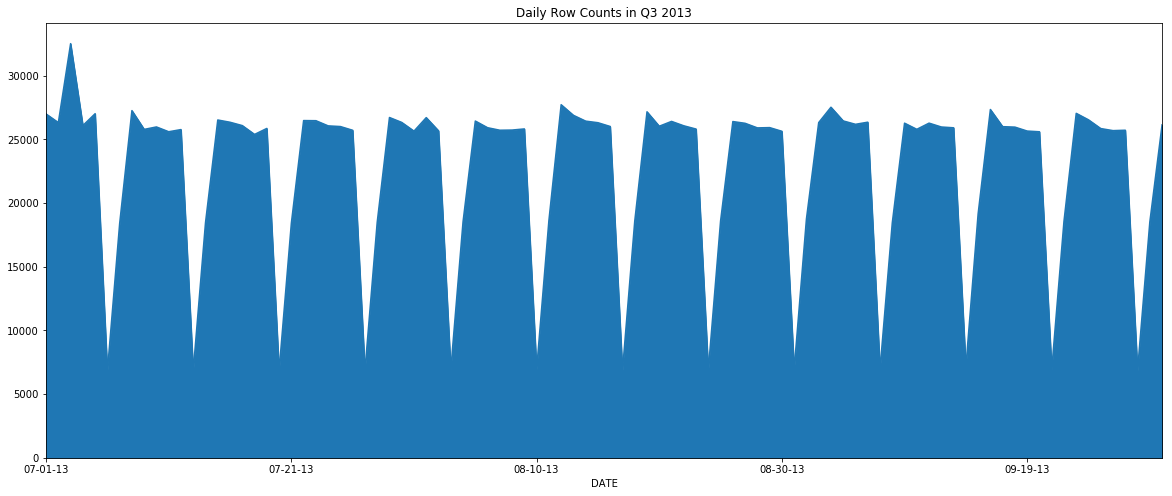

In [29]:
q3_range = (df_2013.DATETIME >= datetime(2013,7,1)) & (df_2013.DATETIME < datetime(2013,10,1))
df_2013_q3 = df_2013[q3_range]
df_2013_q3_counts = df_2013_q3.groupby(['DATE']).size()
plt.figure()
df_2013_q3_counts.plot(kind = 'area', figsize = (20,8), title = 'Daily Row Counts in Q3 2013')
plt.show()

***

Question 2: Plot the daily total number of entries & exits across the system for Q3 2013

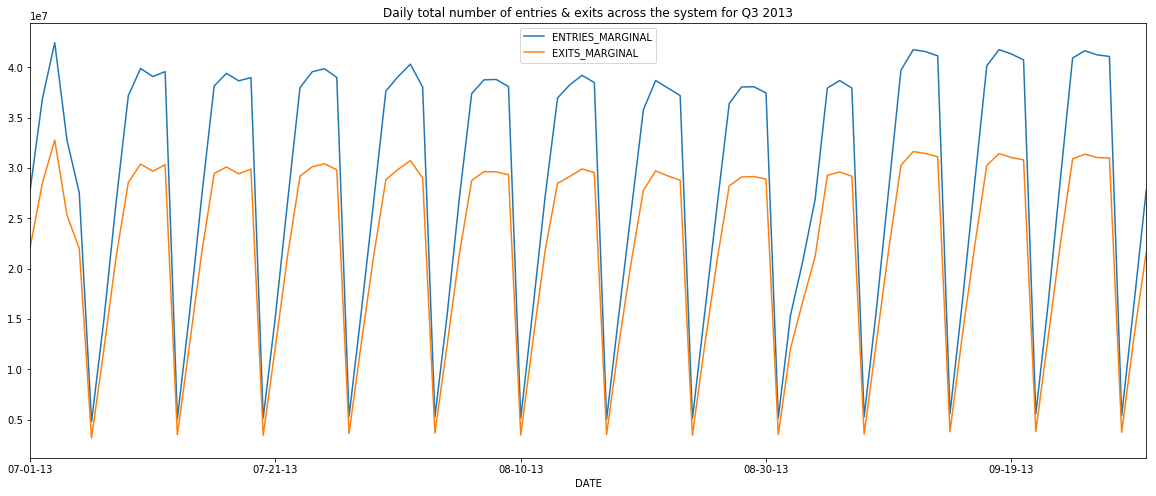

In [30]:
df_2013_q3_daily_ee = df_2013_q3[['DATE','ENTRIES_MARGINAL','EXITS_MARGINAL']].groupby(['DATE']).agg(np.sum)
plt.figure()
df_2013_q3_daily_ee.plot(kind = 'line', figsize = (20,8), title = 'Daily total number of entries & exits across the system for Q3 2013')
plt.show()

***

Question 3:  Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA

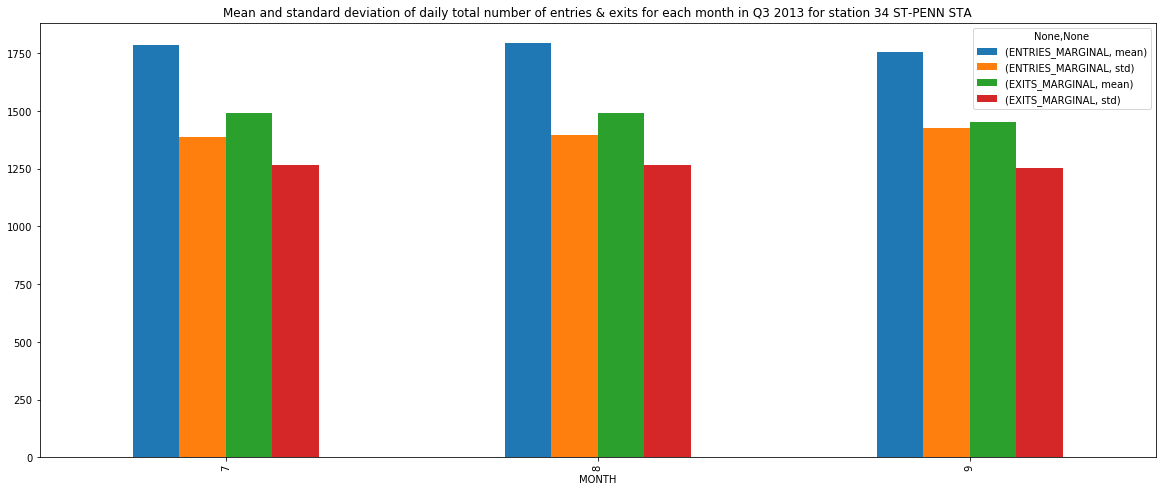

In [31]:
df_2013_q3_penn = df_2013_q3[df_2013_q3['Station'] == '34 ST-PENN STA']
df_2013_q3_penn = df_2013_q3_penn[['MONTH', 'ENTRIES_MARGINAL','EXITS_MARGINAL']]
df_2013_q3_penn_mean_std = df_2013_q3_penn[['MONTH','ENTRIES_MARGINAL', 'EXITS_MARGINAL']].groupby(['MONTH']).agg([np.mean, np.std])
plt.figure()
df_2013_q3_penn_mean_std.plot(kind = 'bar', figsize = (20,8), title = 'Mean and standard deviation of daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA')
plt.show()

***

Question 4: Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA

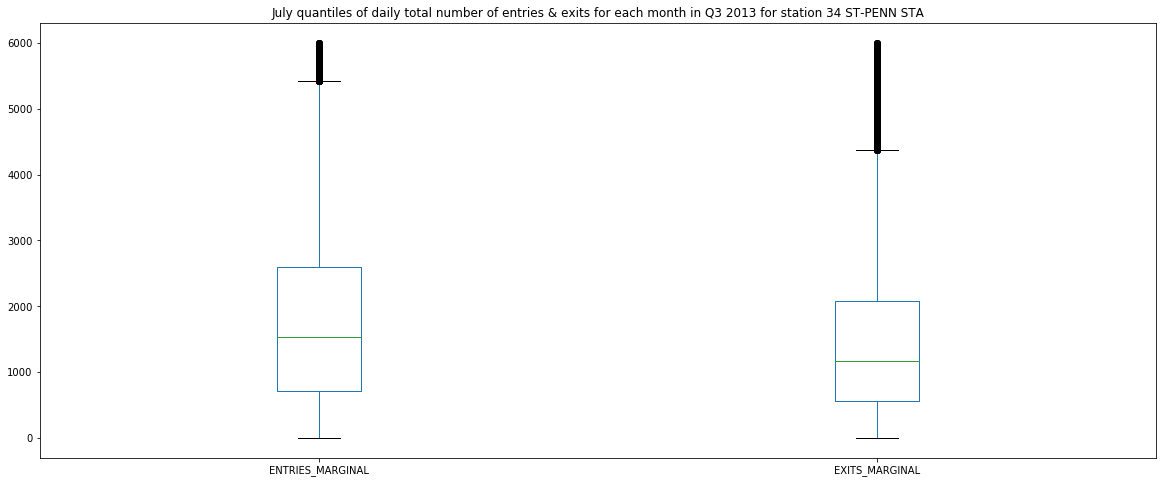

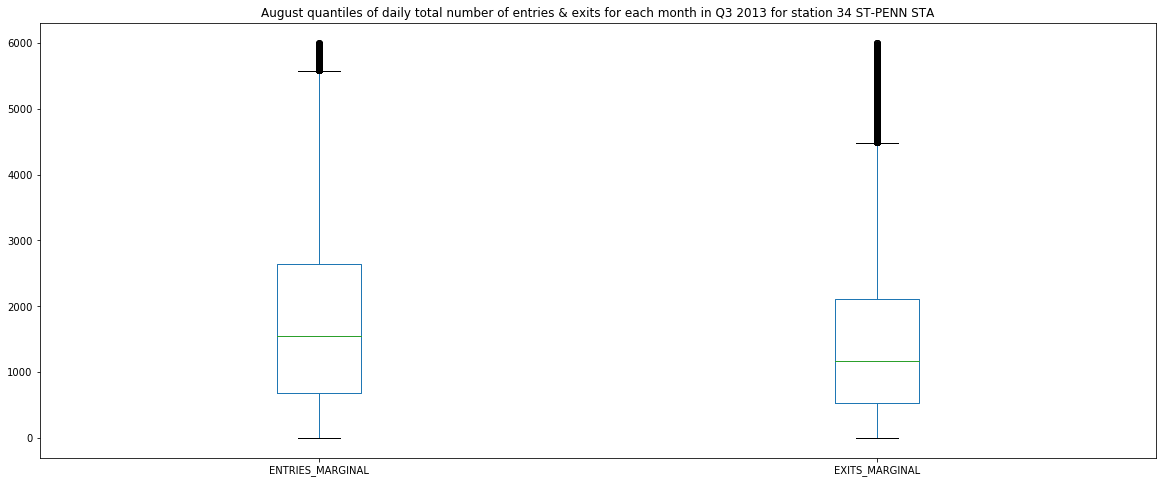

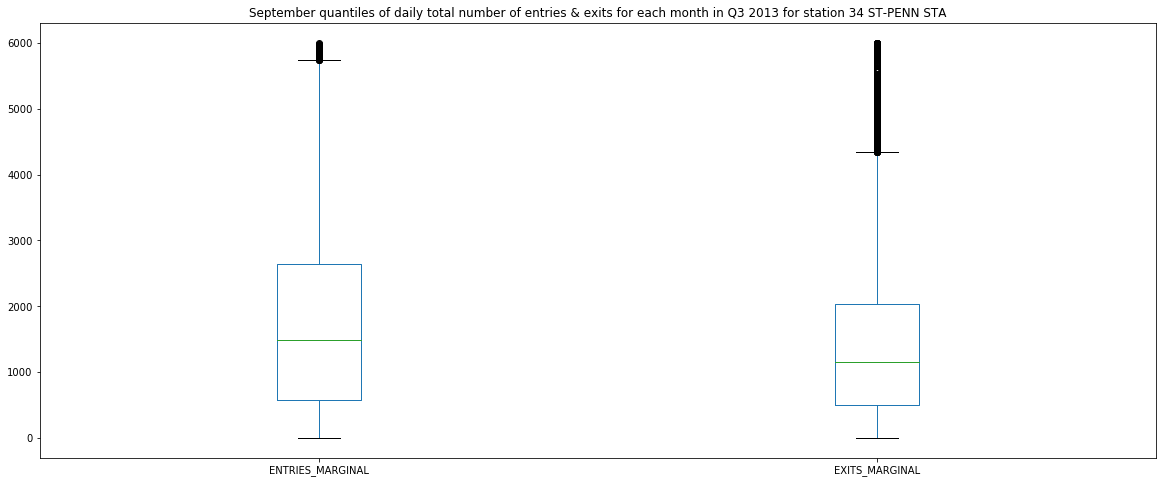

In [42]:
df_2013_q3_penn_percentile = df_2013_q3_penn.set_index('MONTH')
plt.figure()
df_2013_q3_penn_percentile.loc[7].plot(kind = 'box', figsize = (20,8), title = 'July quantiles of daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA')
df_2013_q3_penn_percentile.loc[8].plot(kind = 'box', figsize = (20,8), title = 'August quantiles of daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA')
df_2013_q3_penn_percentile.loc[9].plot(kind = 'box', figsize = (20,8), title = 'September quantiles of daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA')
plt.show()


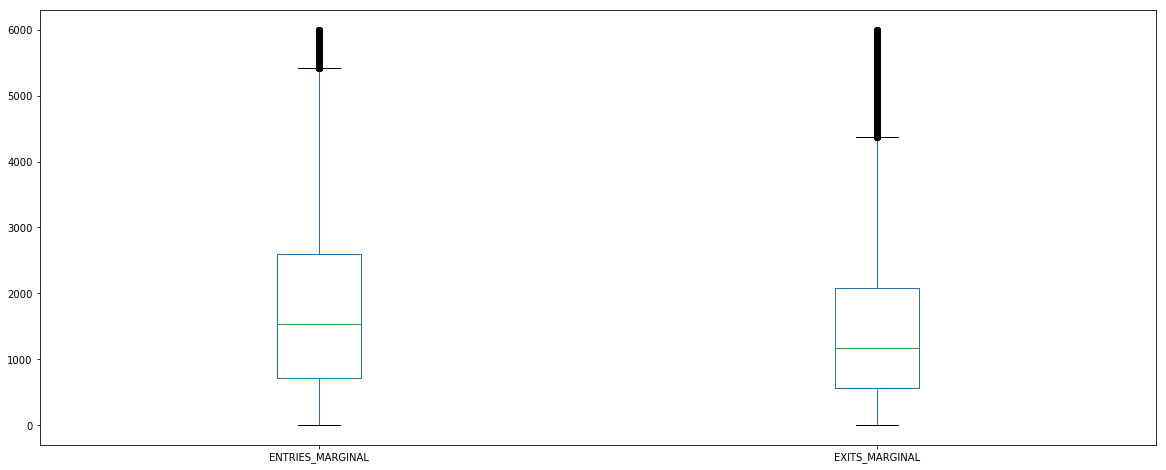

In [41]:
df_2013_q3_penn_percentile = df_2013_q3_penn.set_index('MONTH')
plt.figure()
df_2013_q3_penn_july.loc[7].plot(kind = 'box', figsize = (20,8), tit)
plt.show()

***

Question 5:  Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013

In [34]:
df_2013_closed_count = df_2013_closed_daily['BUSY_MARGINAL'].groupby('DAY').count().rename('CLOSED')
df_2013_nfull_count = df_2013_daily_nfull.groupby('DAY').count().rename('NOT_FULL_CAPACITY')
df_2013_closed_nfull = pd.concat([df_2013_closed_count, df_2013_nfull_count], axis = 1)
df_2013_closed_nfull['DAYS'] = df_2013_closed_nfull.index

In [35]:
temp = df_2013_q3[['DAY', 'DATE']].groupby(['DAY','DATE']).count()
temp['DATE2'] = temp.index.levels[1]
temp.index = temp.index.droplevel(1)

df_2013_closed_nfull = temp.merge(df_2013_closed_nfull, left_index = True, right_index = True, how = 'left')
df_2013_closed_nfull = df_2013_closed_nfull[['DATE2', 'CLOSED', 'NOT_FULL_CAPACITY']]
df_2013_closed_nfull.set_index('DATE2', inplace = True)
df_2013_closed_nfull

,CLOSED,NOT_FULL_CAPACITY
DATE2,,
07-01-13,NaN,1.0
07-02-13,NaN,1.0
07-03-13,NaN,2.0
07-04-13,NaN,NaN
07-05-13,NaN,1.0
07-06-13,2.0,NaN
07-07-13,NaN,3.0
07-08-13,NaN,1.0
07-09-13,NaN,1.0


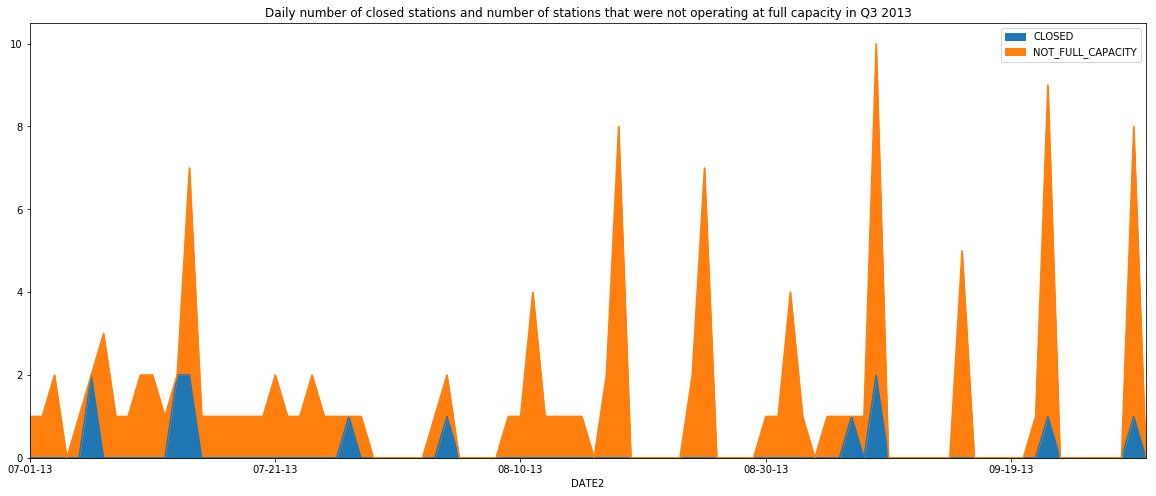

In [36]:
plt.figure()
df_2013_closed_nfull.plot(kind = 'area', figsize = (20,8), title = 'Daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013')
plt.show()